# Problem Statement

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**Content** - The **water_potability.csv** file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

**Task 1**
* Predict if water is safe for human consumption or not.


1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Basic EDA

In [23]:
df.shape

(3276, 10)

In [24]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [26]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Imbalance Data

In [27]:
df['Potability']

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [28]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [29]:
print(round(len(df[df['Potability'] == 0])/len(df), 2))
print(round(len(df[df['Potability'] == 1])/len(df), 2))

0.61
0.39


# Missing Data

In [30]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [31]:
df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [32]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)

ph
Sulfate
Trihalomethanes


------------------------ph-------------------------

Mean -  7.080794504276835
Median -  7.036752103833548



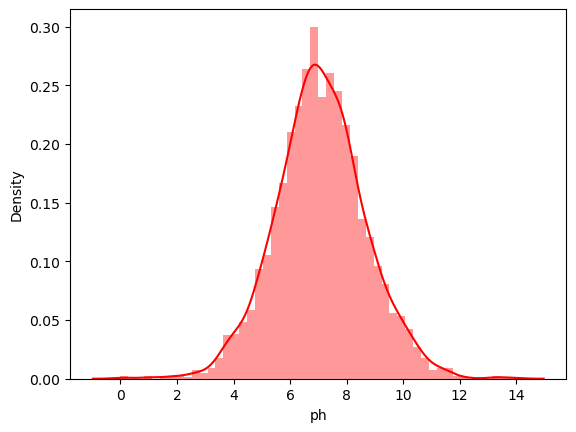

------------------------Sulfate-------------------------

Mean -  333.7757766108135
Median -  333.073545745888



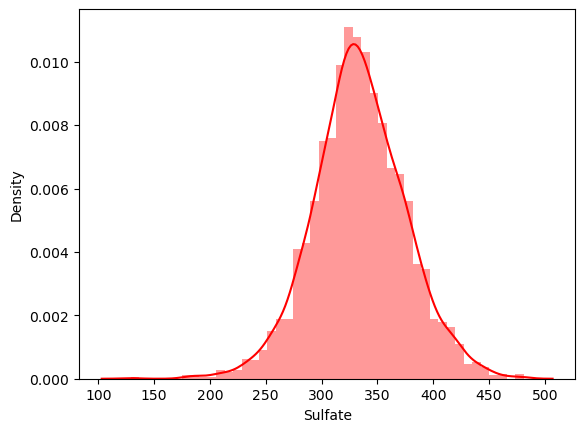

------------------------Trihalomethanes-------------------------

Mean -  66.39629294676803
Median -  66.62248509808484



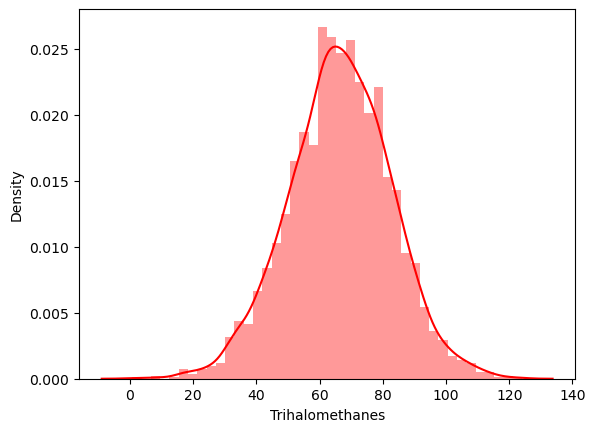

In [33]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(f'------------------------{i}-------------------------\n')
        print(f'Mean -  {df[i].mean()}')
        print(f'Median -  {df[i].median()}\n')
        sns.distplot(df[i], color='r')
        plt.show()

In [34]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(f'{i} --> {df[i].mean()}')

ph --> 7.080794504276835
Sulfate --> 333.7757766108135
Trihalomethanes --> 66.39629294676803


In [35]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].mean(), inplace=True)

In [36]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Duplicate Data

In [37]:
df.duplicated().sum()

0

In [38]:
df[df.duplicated()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


# Outliers or Anomalies

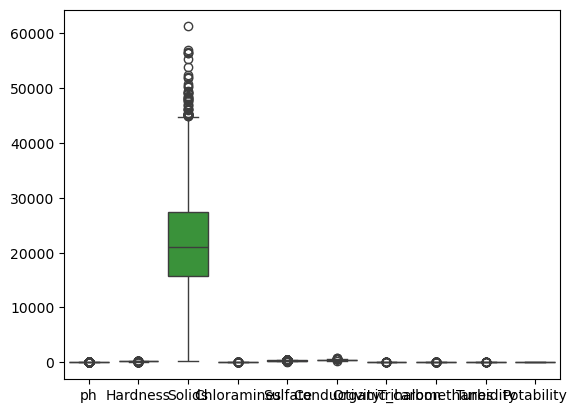

In [39]:
# boxplot

sns.boxplot(df)
plt.show()

------------------------ph-------------------------



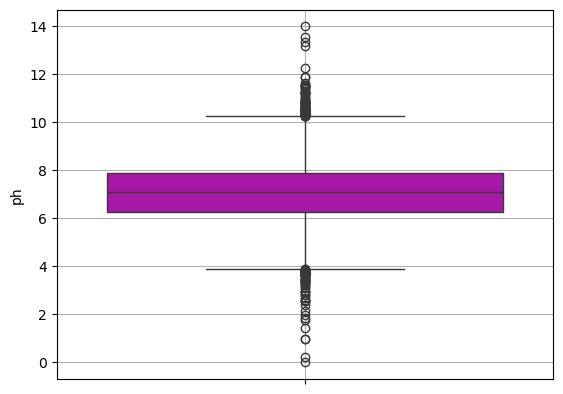

------------------------Hardness-------------------------



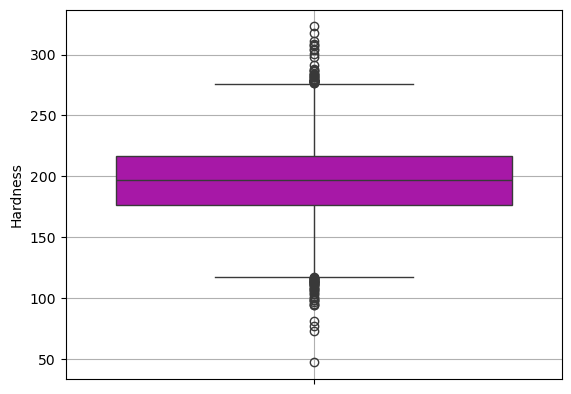

------------------------Solids-------------------------



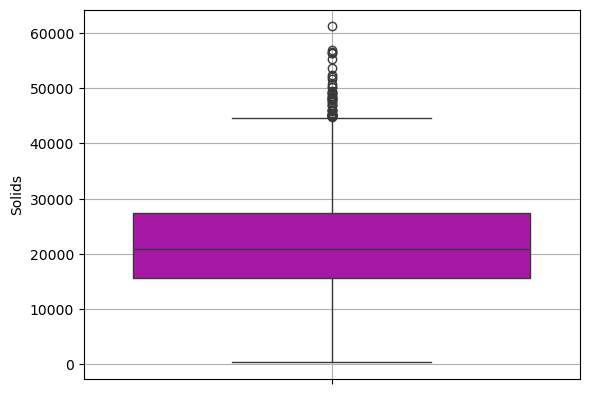

------------------------Chloramines-------------------------



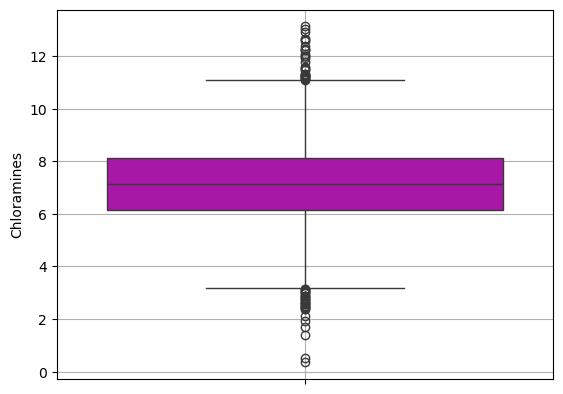

------------------------Sulfate-------------------------



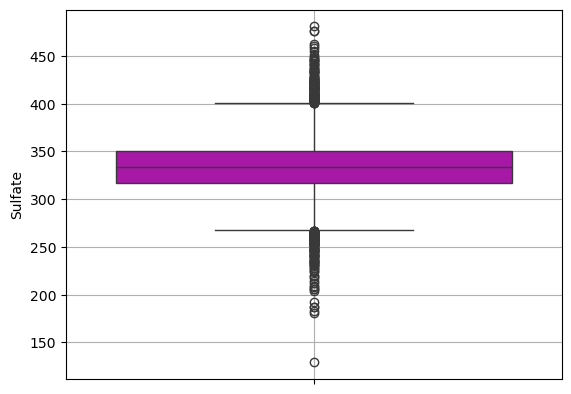

------------------------Conductivity-------------------------



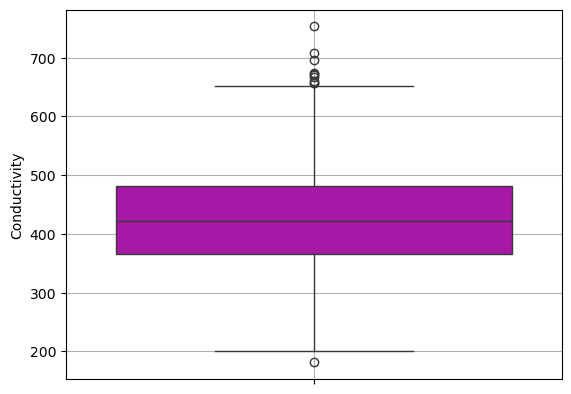

------------------------Organic_carbon-------------------------



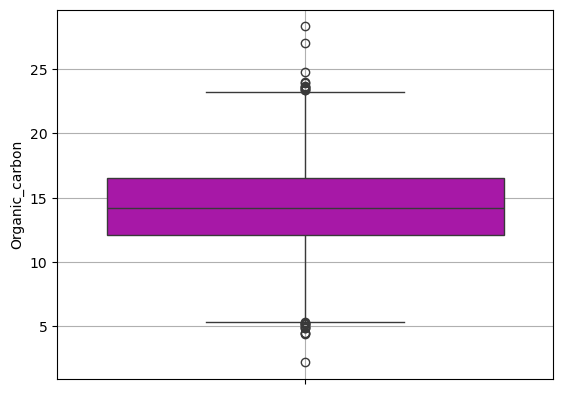

------------------------Trihalomethanes-------------------------



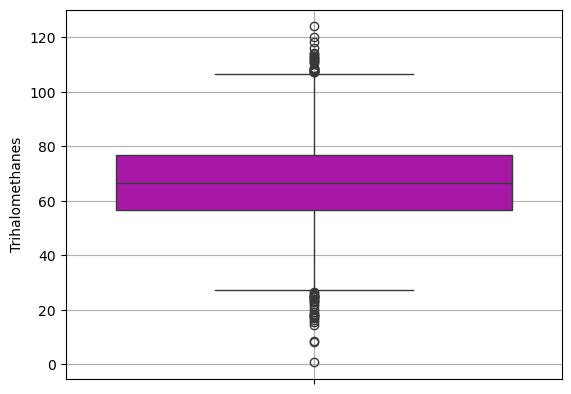

------------------------Turbidity-------------------------



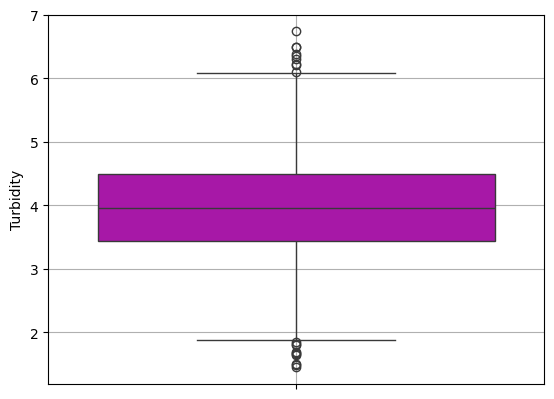

In [40]:
for i in df.columns:
    if i == 'Potability':
        pass
    else:
        print(f'------------------------{i}-------------------------\n')
        sns.boxplot(df[i], color='m')
        plt.grid()
        plt.show()

# Using IQR, removing outliers

In [84]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
print(f'IQR : \n\n{IQR}')

IQR : 

ph                     1.444280
Hardness              36.733904
Solids             11145.429815
Chloramines            1.864479
Sulfate               28.439606
Conductivity         115.804320
Organic_carbon         4.492618
Trihalomethanes       19.712810
Turbidity              1.055388
Potability             1.000000
dtype: float64


In [85]:
# Define upper and lower bound for outliers

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f'Lower bound for outliers: \n\n{lower_bound}\n\n')
print(f'Upper bound for outliers: \n\n{upper_bound}')

Lower bound for outliers: 

ph                    4.181607
Hardness            123.909288
Solids            -1121.379501
Chloramines           3.391856
Sulfate             276.822219
Conductivity        191.935266
Organic_carbon        5.343957
Trihalomethanes      27.346736
Turbidity             1.856053
Potability           -1.500000
dtype: float64


Upper bound for outliers: 

ph                     9.958726
Hardness             270.844903
Solids             43460.339759
Chloramines           10.849772
Sulfate              390.580645
Conductivity         655.152544
Organic_carbon        23.314427
Trihalomethanes      106.197977
Turbidity              6.077605
Potability             2.500000
dtype: float64


In [86]:
df.shape

(2666, 10)

In [87]:
df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [91]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [92]:
df.shape

(2459, 10)

In [93]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# Feature Selection

In [94]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.136007,-0.073243,-0.046455,0.016446,0.010826,0.013272,-0.003072,-0.035339,-0.003889
Hardness,0.136007,1.000000,-0.049088,-0.034484,-0.020757,-0.025503,0.012592,-0.006629,-0.019142,0.004243
Solids,-0.073243,-0.049088,1.000000,-0.034596,-0.106644,-0.000568,0.026837,-0.028310,0.025431,0.020804
Chloramines,-0.046455,-0.034484,-0.034596,1.000000,0.034653,-0.019490,0.013530,0.020820,-0.019177,-0.004172
Sulfate,0.016446,-0.020757,-0.106644,0.034653,1.000000,0.001169,-0.024490,-0.011861,-0.020296,-0.012648
Conductivity,0.010826,-0.025503,-0.000568,-0.019490,0.001169,1.000000,0.005523,-0.002918,0.005267,-0.010367
Organic_carbon,0.013272,0.012592,0.026837,0.013530,-0.024490,0.005523,1.000000,-0.002132,-0.016928,-0.022442
Trihalomethanes,-0.003072,-0.006629,-0.028310,0.020820,-0.011861,-0.002918,-0.002132,1.000000,-0.023883,0.014320
Turbidity,-0.035339,-0.019142,0.025431,-0.019177,-0.020296,0.005267,-0.016928,-0.023883,1.000000,-0.004671
Potability,-0.003889,0.004243,0.020804,-0.004172,-0.012648,-0.010367,-0.022442,0.014320,-0.004671,1.000000


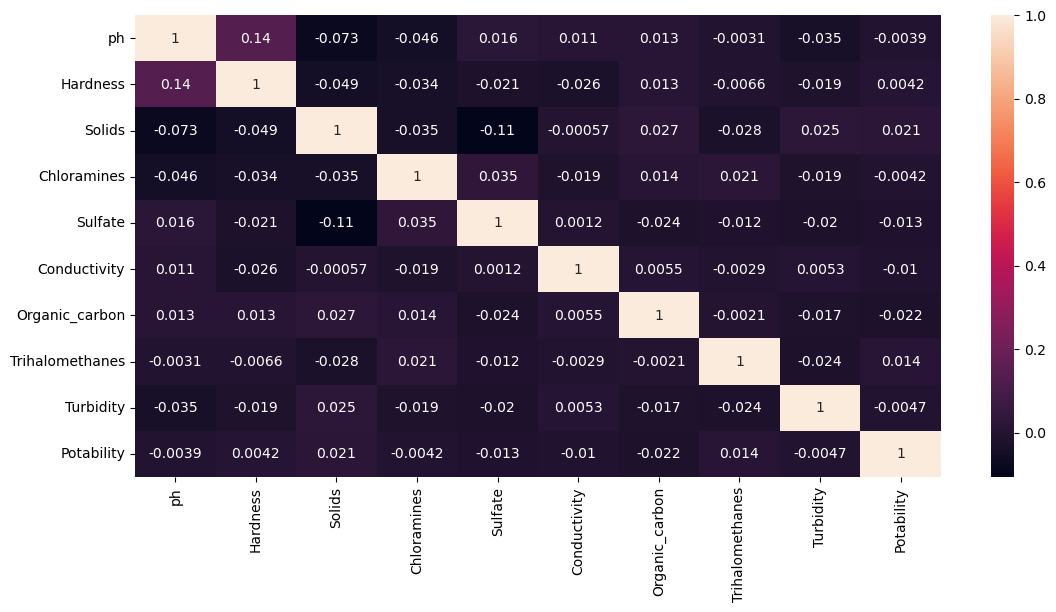

In [95]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [96]:
df.corr()['Potability']

ph                -0.003889
Hardness           0.004243
Solids             0.020804
Chloramines       -0.004172
Sulfate           -0.012648
Conductivity      -0.010367
Organic_carbon    -0.022442
Trihalomethanes    0.014320
Turbidity         -0.004671
Potability         1.000000
Name: Potability, dtype: float64

# Model Building

In [97]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# Separate your Independent and Dependent data

In [98]:
X = df.drop(columns=['Potability'], axis=1)
y = df['Potability']

In [99]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [100]:
y

0       0
2       0
3       0
4       0
5       0
       ..
3270    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 2459, dtype: int64

# Split your data into train and test

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
778,8.473649,182.997199,36412.488260,6.144666,333.775777,414.308055,14.255356,56.735187,3.487816
2100,4.894278,184.552715,10922.541994,7.461703,352.830222,338.681069,21.624718,91.007934,3.594991
2556,8.394510,224.347147,23961.504535,4.724373,337.406342,476.579456,17.213676,64.975961,3.712473
1103,7.992320,230.179573,17076.663789,9.598742,333.775777,522.888054,14.449181,68.640768,4.342797
617,6.284985,196.775056,29213.620386,8.528793,334.477795,574.540671,11.095893,66.396293,5.703288
...,...,...,...,...,...,...,...,...,...
2162,8.515977,212.304629,28553.559458,7.225366,342.604083,341.740345,9.003647,60.725201,2.165682
1427,8.305064,177.174394,8451.319111,5.807122,335.871718,361.691437,14.359351,50.926671,4.461211
1473,6.394980,220.422389,21051.256907,8.739505,348.047760,353.365418,19.637042,48.709989,4.732003
1697,6.356511,164.618185,17538.541172,8.345192,345.144958,430.959505,15.329438,47.021382,3.415526


In [103]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
988,7.080795,190.630636,26913.373486,4.649166,302.417529,509.284869,16.198948,64.101951,3.452822
859,7.080795,203.050244,28184.900527,7.076634,344.524179,445.700761,19.775367,53.270152,4.456104
3202,8.743959,197.749325,40843.616551,6.368862,310.677200,326.253326,12.503203,66.421884,4.118973
2572,9.658662,240.348820,20269.731280,7.050729,374.181674,567.784276,15.587206,55.835966,4.639387
369,6.952512,211.697297,33737.288524,6.300871,333.775777,395.407004,14.182396,39.802907,4.105495
...,...,...,...,...,...,...,...,...,...
512,7.803833,223.688111,37376.792989,6.664969,333.775777,343.764013,16.697408,74.782434,2.907387
329,7.672910,152.878305,22989.351184,6.231913,343.439017,401.140879,14.252684,64.291292,4.268227
1093,8.501711,193.908906,21289.179593,7.108190,333.775777,393.176681,13.643236,61.125080,5.612296
181,6.511618,181.873422,29136.814624,7.685775,345.751638,475.341351,12.321232,52.437617,4.850434


# Feature Scaling

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [106]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
778,8.473649,182.997199,36412.488260,6.144666,333.775777,414.308055,14.255356,56.735187,3.487816
2100,4.894278,184.552715,10922.541994,7.461703,352.830222,338.681069,21.624718,91.007934,3.594991
2556,8.394510,224.347147,23961.504535,4.724373,337.406342,476.579456,17.213676,64.975961,3.712473
1103,7.992320,230.179573,17076.663789,9.598742,333.775777,522.888054,14.449181,68.640768,4.342797
617,6.284985,196.775056,29213.620386,8.528793,334.477795,574.540671,11.095893,66.396293,5.703288
...,...,...,...,...,...,...,...,...,...
2162,8.515977,212.304629,28553.559458,7.225366,342.604083,341.740345,9.003647,60.725201,2.165682
1427,8.305064,177.174394,8451.319111,5.807122,335.871718,361.691437,14.359351,50.926671,4.461211
1473,6.394980,220.422389,21051.256907,8.739505,348.047760,353.365418,19.637042,48.709989,4.732003
1697,6.356511,164.618185,17538.541172,8.345192,345.144958,430.959505,15.329438,47.021382,3.415526


In [107]:
X_train_sc

array([[ 1.20984315, -0.50893234,  1.91664216, ..., -0.00372711,
        -0.6343086 , -0.61229183],
       [-1.90934668, -0.45179819, -1.36356302, ...,  2.2790031 ,
         1.68589406, -0.47085971],
       [ 1.140878  ,  1.00985218,  0.31437196, ...,  0.91264067,
        -0.07642319, -0.31582548],
       ...,
       [-0.60158191,  0.86569572, -0.06013685, ...,  1.66330126,
        -1.17759991,  1.02958969],
       [-0.6351055 , -1.18399392, -0.512175  , ...,  0.32897992,
        -1.29191552, -0.70768983],
       [ 0.46346123, -0.52022219,  1.57326592, ..., -0.06250675,
         1.12900825, -0.6984287 ]])

In [108]:
X_test_sc

array([[-0.00393946, -0.22855602,  0.69423686, ...,  0.59831892,
        -0.13559203, -0.65847199],
       [-0.00393946,  0.22761644,  0.85786488, ...,  1.70614891,
        -0.86888517,  0.66550203],
       [ 1.4454001 ,  0.03291359,  2.48686737, ..., -0.54647319,
         0.02146316,  0.2206096 ],
       ...,
       [ 1.23429746, -0.10814509, -0.02951947, ..., -0.19333714,
        -0.33712083,  2.19126183],
       [-0.4999398 , -0.5502087 ,  0.98036312, ..., -0.60284051,
        -0.92524624,  1.18587627],
       [-1.71628983, -0.17999501, -0.24424973, ..., -1.022486  ,
        -1.14183884, -0.0656002 ]])

# Model Selection

## Logistic Regression

In [109]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [110]:
print(f'Training Accuracy : {round(lr.score(X_train_sc, y_train), 2)*100} %')
print(f'Test Accuracy : {round(lr.score(X_test_sc, y_test), 2)*100} %')

Training Accuracy : 63.0 %
Test Accuracy : 65.0 %


## Decision Tree

In [111]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=5)

In [112]:
print(f'Training Accuracy : {round(dtree.score(X_train_sc, y_train), 2)*100} %')
print(f'Test Accuracy : {round(dtree.score(X_test_sc, y_test), 2)*100} %')

Training Accuracy : 70.0 %
Test Accuracy : 62.0 %


# Model Training - Decision Tree

In [113]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=5)

# Model Prediction

In [114]:
y_pred_train = dtree.predict(X_train_sc)
y_pred_test = dtree.predict(X_test_sc)

In [115]:
X_train[:3]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
778,8.473649,182.997199,36412.488260,6.144666,333.775777,414.308055,14.255356,56.735187,3.487816
2100,4.894278,184.552715,10922.541994,7.461703,352.830222,338.681069,21.624718,91.007934,3.594991
2556,8.394510,224.347147,23961.504535,4.724373,337.406342,476.579456,17.213676,64.975961,3.712473


In [116]:
y_train[:3]

778     1
2100    0
2556    0
Name: Potability, dtype: int64

In [117]:
y_pred_train[:3]

array([1, 0, 0], dtype=int64)

# Model Evaluation

In [118]:
# Training Data

confusion_matrix(y_train, y_pred_train)

array([[1121,  109],
       [ 489,  248]], dtype=int64)

<Axes: >

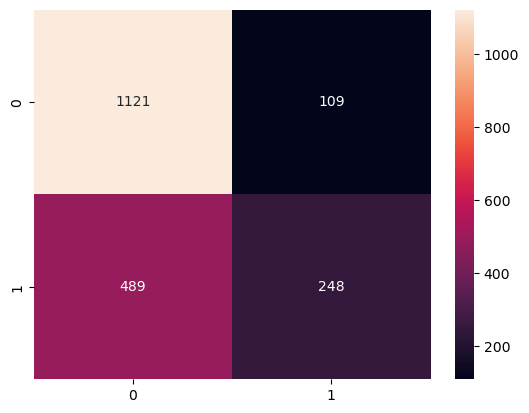

In [119]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='.4g')

In [120]:
accuracy_score(y_train, y_pred_train)

0.6959837315709202

In [121]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79      1230
           1       0.69      0.34      0.45       737

    accuracy                           0.70      1967
   macro avg       0.70      0.62      0.62      1967
weighted avg       0.70      0.70      0.66      1967



In [122]:
# Test Data

In [123]:
confusion_matrix(y_test, y_pred_test)

array([[274,  44],
       [143,  31]], dtype=int64)

<Axes: >

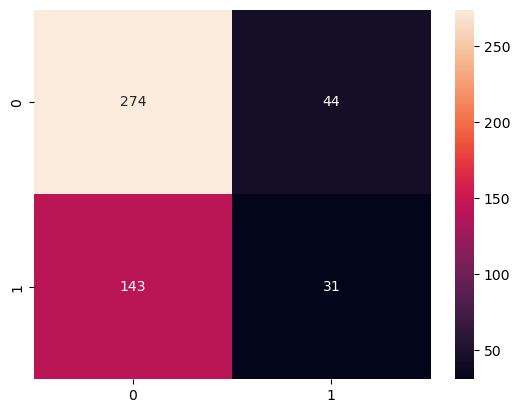

In [124]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.3g')

In [125]:
accuracy_score(y_test, y_pred_test)

0.6199186991869918

In [126]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75       318
           1       0.41      0.18      0.25       174

    accuracy                           0.62       492
   macro avg       0.54      0.52      0.50       492
weighted avg       0.57      0.62      0.57       492



In [127]:
new_data = [[10.388322, 156.234007, 20795.820484, 5333.775777, 133.946197, 13.821321, 51.190219, 4.854772, 3.96]]
new_data

[[10.388322,
  156.234007,
  20795.820484,
  5333.775777,
  133.946197,
  13.821321,
  51.190219,
  4.854772,
  3.96]]

In [131]:
res=dtree.predict(new_data)
res[0] 

0